## 1:  What are we doing?

### Data is everywhere... start by being curious and asking a question.

I want to see the distributions of pokemon types across the universal pokedex.  Just going off of the basic blue/red/yellow, gold/silver/crystal, ruby/sapphire/emerald, pearl/diamond, ... scarlet/violet games, NOT including Pokemon dungeon, Pokemon Snap, Pokemon Go, Pokemon Legends, etc. (set some boundaries/limitations and avoid scope-creep)



                        A pokemon crash course:

* Gen 1:  Kanto - Blue/Red/Yellow >> Set baseline with 150 creatures called "pokemon"

* Gen 2:  Jhoto - Gold/Silver/Crystal >> Introduced 100 more in addition to the original 150 (total of 250)

* Gen 3:  Hoenn - Ruby/Sapphire/Emerald >> Introduced more pokemon "native" to the Hoenn region PLUS a cross-section of first 250

* Gen 4:  _____ - Diamond/Pearl >> More regional/original pokemon plus a mixture of the pokemon available in generations 1-3

* ... >> somewhere along the line, they started introducing regional variants of existing pokemon, i.e., different types/morphologies/etc.

* Gen 9:  ?? - Scarlet/Violet >> The pokedex* is all over the place, but the pattern stands: a mixture of originals plus pokemon from previous versions, including regional variants. 

(*the pokedex is a device which is used to register data about the creatures you encounter.)


                        _OK but like... why?_

So we have these creatures... what do we do with them?  The player "catches" them and raises them, battling them against other trainers.  Ostensibly the goal is complete the pokedex*... whatever.  Part of the battle dynamic is what are called "type matchups"--pokemon who are grass type are weak against fire type, pokemon who are fire type are weak against water type, etc.


Gen 1 started with X types, we are now up to Y types.  The numbers are not overly important, just need to know the convention has stayed consistent while expanding, i.e., the framework is backward-compatible all the way to the first generation.

                        _Back to reality_

You are a data scientist working for the pokemon corporation (we're pulling back out to reality now), and your project manager approaches you and tells you, "You are going to help design the new pokedex.  We want our design team to start working on illustrations for some new region-original pokemon.  I want you to analyze the distribution of types across the universal pokedex and give me a list of the 10 least common types."

In [1]:
import pandas as pd
import numpy as np
import requests
import json
from bs4 import BeautifulSoup
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# first, what is allowed, web-scraping-wise?

# https://www.rottentomatoes.com/robots.txt >> robots.txt file
# https://www.washingtonpost.com/robots.txt

# check out https://bulbapedia.bulbagarden.net/robots.txt 

In [2]:
# pull data/page
# convert to parseable html
# record number
# record name
# record type
# >> bonus: record whether it has a regional variant (True/False)
# collect the name of the next pokemon so you can use it to make the next URL >> look at line 548 of Persian's page
# push to dataframe

userAgent = f"ds6001rt/0.0 (vhu4jv@virginia.edu) python-requests/{requests.__version__}"
myHeaders = {
    "User-Agent": userAgent,
    "From": "vhu4jv@virginia.edu"    
}

url = "https://bulbapedia.bulbagarden.net/wiki/Persian_(Pok%C3%A9mon)"
requestA = requests.get(url, headers=myHeaders)

requestA

<Response [200]>

In [3]:
# convert to parseable HTML
initData = BeautifulSoup(requestA.text, "html.parser")
initData

<!DOCTYPE html>

<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>Persian (Pokémon) - Bulbapedia, the community-driven Pokémon encyclopedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"40b3b4d0021d312e6ff263c2","wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Persian_(Pokémon)","wgTitle":"Persian (Pokémon)","wgCurRevisionId":4459841,"wgRevisionId":4459841,"wgArticleId":2367,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Pokémon","Generation I Pokémon","Normal-type Pokémon","Single-type Pokémon","Dark-type Pokémon","Pokémon with a gender ratio of one male

### How can we use the HTML from the source code page to walk in on where we want to be?

1.) look at line 88 >> indentation following bg-global-menu bg-bulbapedia-menu >> look at webpage. you can skip that noise.

2.) look at line 7243: 'sprites' >> look at webpage. that's WAY too far down, so walk it back up

3.) look at lines 664-680: 'ability' >> look at webpage, now we're getting closer

In [4]:
initData.find_all("b") #narrow it down to particular tags >> in  this case, all "b" tags >> *cough* look at line 608

[<b>Persian</b>,
 <b><span class="explain" title="Perushian">ペルシアン</span></b>,
 <b><a href="/wiki/Type" title="Type"><span style="color:#000;">Types</span></a></b>,
 <b>Normal</b>,
 <b>Unknown</b>,
 <b>Dark</b>,
 <b>Unknown</b>,
 <b>Unknown</b>,
 <b>Unknown</b>,
 <b>Unknown</b>,
 <b>Unknown</b>,
 <b>Unknown</b>,
 <b>Unknown</b>,
 <b>Unknown</b>,
 <b>Unknown</b>,
 <b>Unknown</b>,
 <b>Unknown</b>,
 <b><a href="/wiki/Ability" title="Ability"><span style="color:#000;">Abilities</span></a></b>,
 <b><a href="/wiki/List_of_Pok%C3%A9mon_by_gender_ratio" title="List of Pokémon by gender ratio"><span style="color:#000;">Gender ratio</span></a></b>,
 <b><a href="/wiki/Catch_rate" title="Catch rate"><span style="color:#000;">Catch rate</span></a></b>,
 <b><a href="/wiki/Pok%C3%A9mon_breeding" title="Pokémon breeding"><span style="color:#000;">Breeding</span></a></b>,
 <b><a href="/wiki/Egg_Group" title="Egg Group"><span style="color:#000;">Egg Group</span></a></b>,
 <b><a href="/wiki/Egg_cycle" ti

In [5]:
# what about a dual-type pokemon?

url2 = "https://bulbapedia.bulbagarden.net/wiki/Metagross_(Pok%C3%A9mon)"
requestB = requests.get(url2, headers=myHeaders)

requestB

<Response [200]>

In [6]:
# convert to parseable HTML
initData2 = BeautifulSoup(requestB.text, "html.parser")
#initData2

initData2.find_all("b") 

[<b>Metagross</b>,
 <b><span class="explain" title="Metagurosu">メタグロス</span></b>,
 <b><a href="/wiki/Type" title="Type"><span style="color:#000;">Type</span></a></b>,
 <b>Steel</b>,
 <b>Psychic</b>,
 <b>Unknown</b>,
 <b>Unknown</b>,
 <b>Unknown</b>,
 <b>Unknown</b>,
 <b>Unknown</b>,
 <b>Unknown</b>,
 <b>Unknown</b>,
 <b>Unknown</b>,
 <b>Unknown</b>,
 <b>Unknown</b>,
 <b>Unknown</b>,
 <b>Unknown</b>,
 <b><a href="/wiki/Ability" title="Ability"><span style="color:#000;">Abilities</span></a></b>,
 <b><a href="/wiki/List_of_Pok%C3%A9mon_by_gender_ratio" title="List of Pokémon by gender ratio"><span style="color:#000;">Gender ratio</span></a></b>,
 <b><a href="/wiki/Catch_rate" title="Catch rate"><span style="color:#000;">Catch rate</span></a></b>,
 <b><a href="/wiki/Pok%C3%A9mon_breeding" title="Pokémon breeding"><span style="color:#000;">Breeding</span></a></b>,
 <b><a href="/wiki/Egg_Group" title="Egg Group"><span style="color:#000;">Egg Group</span></a></b>,
 <b><a href="/wiki/Egg_cycle

In [7]:
# let's do one more...

url3 = "https://bulbapedia.bulbagarden.net/wiki/Sharpedo_(Pok%C3%A9mon)"
requestC = requests.get(url3, headers=myHeaders)

requestC

<Response [200]>

In [8]:
# convert to parseable HTML
initData3 = BeautifulSoup(requestC.text, "html.parser")
#initData2

initData3.find_all("b") 

[<b>Sharpedo</b>,
 <b><span class="explain" title="Samehadā">サメハダー</span></b>,
 <b><a href="/wiki/Type" title="Type"><span style="color:#000;">Type</span></a></b>,
 <b>Water</b>,
 <b>Dark</b>,
 <b>Unknown</b>,
 <b>Unknown</b>,
 <b>Unknown</b>,
 <b>Unknown</b>,
 <b>Unknown</b>,
 <b>Unknown</b>,
 <b>Unknown</b>,
 <b>Unknown</b>,
 <b>Unknown</b>,
 <b>Unknown</b>,
 <b>Unknown</b>,
 <b>Unknown</b>,
 <b><a href="/wiki/Ability" title="Ability"><span style="color:#000;">Abilities</span></a></b>,
 <b><a href="/wiki/List_of_Pok%C3%A9mon_by_gender_ratio" title="List of Pokémon by gender ratio"><span style="color:#000;">Gender ratio</span></a></b>,
 <b><a href="/wiki/Catch_rate" title="Catch rate"><span style="color:#000;">Catch rate</span></a></b>,
 <b><a href="/wiki/Pok%C3%A9mon_breeding" title="Pokémon breeding"><span style="color:#000;">Breeding</span></a></b>,
 <b><a href="/wiki/Egg_Group" title="Egg Group"><span style="color:#000;">Egg Group</span></a></b>,
 <b><a href="/wiki/Egg_cycle" titl

### How did I pick the pokemon I was looking at?  ARBITRARILY.

### You can be looking at songs, the song doesn't matter.  You can be looking at movies, the movie doesn't matter.

### What matters is that YOU know what song/movie/whatever you are using so you can look for a PATTERN; and here we see a pattern emerges.

In [4]:
btagList = initData.find_all("b")

name = ''
type1 = ''
type2 = ''
number = ''

#btagList[0] # oh look, there's the name

name = btagList[0].string
#name

#btagList[1] # I don't know what that is. Moving on...

#btagList[2]  # mmm nope.

#btagList[3] # jackpot, there's a  type! but what if it's dual type?
type1 = btagList[3].string
type1

#btagList[4] # hmmmm and this is how we know to stop... use a while loop -> while btag[i].string != 'Unknown'

# record number
# record name       >> we know how to get this
# record type(s)    >> we know how to get this
# record name of next pokemon in pokedex

'Normal'

In [10]:
# before we move on, check the method against the dual type

btagList2 = initData2.find_all("b")
# you can use the attrs dictionary to look for specific tags


name = ''
type1 = ''
type2 = ''
number = ''

#btagList2[0] # oh look, there's the name (same as previous)

name = btagList2[0].string
#name

#btagList2[1] # I don't know what that is. Moving on... >> in all honesty, it's probably regarding Japanese pronunciation

#btagList2[2]  # mmm nope.

#btagList2[3] # jackpot, there's a  type! but what if it's dual type?
type1 = btagList2[3].string
type1

#btagList2[4] # also a type, capture that
type2 = btagList2[4].string
#
#  
btagList2[5] # hmmmm and this is how we know to stop... use a while loop -> while btag[i].string != 'Unknown'

# so there's our pattern for those three data elements, what about the fourth: the pokemon's number?
#  * also don't forget, we will need to handle the cases where type2 is blank due to a pokemon being of single type

<b>Unknown</b>

In [11]:
# Given our previous search, we already have an idea of where NOT to look.

# The number is at the top of the table/graphic from which we pulled the type(s), so we can stay above those lines.

# ctl + F 0053 >> look at line 572 (for Persian)
# ctl + F 376 (for Metagross), scroll scroll scroll to line 572
# ctl + F 319 (for Sharpedo), scroll scroll scroll to IVO line 579


#number_block = initData.find_all("span") 
#number_block                               # there's a lot going on here, but it doesn't look like what we want.

#number_block = initData.find_all('th')
#number_block

# title="List of Pokémon by National Pokédex number"
# priceList = initData.find_all("p", attrs={"class":"price_color"})
#number_block = initData.find_all('th', attrs={'title':"List of Pokémon by National Pokédex number"}) 

# NOPE, look closer >> that string is part of an 'a' tag. Try again.

number_block = initData.find_all('a', attrs={'title':"List of Pokémon by National Pokédex number"})
#number_block

#number_block[0].string
number_block[1].string

'#0053'

In [12]:
num1 = number_block[1].string #trim off the pound sign
num1[1:]

'0053'

In [13]:
number_block2 = initData2.find_all('a', attrs={'title':"List of Pokémon by National Pokédex number"})
#number_block2

# looking for Metagross, we want 376

#number_block2[0].string
number_block2[1].string

'#0376'

In [14]:
number_block3 = initData3.find_all('a', attrs={'title':"List of Pokémon by National Pokédex number"})
#number_block3

# looking for Sharpedo, we want 319

#number_block3[0].string
number_block3[1].string

'#0319'

### So we know how to isolate and capture the name, the number, and the types.

### We need one more critical data element before we can assemble our bot:  how to get to the next webpage.

* go to Barnes and Noble website, search for 'Stephen King', and then scroll through the pages -> look at URL, see the page numbers

As you can see from the URLs we're using...

* https://bulbapedia.bulbagarden.net/wiki/Persian_(Pok%C3%A9mon)
* https://bulbapedia.bulbagarden.net/wiki/Metagross_(Pok%C3%A9mon)
* https://bulbapedia.bulbagarden.net/wiki/Sharpedo_(Pok%C3%A9mon)

the series of webpages does not proceed in a numerical order.  Not the end of the world, but it will make our task a skosh more complicated.

In [15]:
# From Persian, the next pokedex entry is... Psyduck

# Persian's source code, ctl + F psyduck >> Look at line 548
# Click through results, see line 8191 >> then look at the webpage: 2 of the same concept - links for advancement, so we can probably
#   use these

#  * in case we haven't mentioned it yet, we want the data that is not a component/property of a tag but the data INSIDE
#       the tag 
# 
#       (line 548, title="Psyduck (Pokemon)" vs. ...>#0054: Psyduck</span>...) (we want the latter)

pointer1_list = initData.find_all('td')

pointer1_list
#pointer1_list = initData.find_all('td', attrs={'style':'text-align: left'})
#pointer1_list[0].get_text()
#next_up = pointer1_list[0].get_text()
#print(next_up)

[<td colspan="3" style="text-align: center; background: #FFF; border-top-left-radius: 15px; -moz-border-radius-topleft: 15px; -webkit-border-top-left-radius: 15px; -khtml-border-top-left-radius: 15px; -icab-border-top-left-radius: 15px; -o-border-top-left-radius: 15px; border-top-right-radius: 15px; -moz-border-radius-topright: 15px; -webkit-border-top-right-radius: 15px; -khtml-border-top-right-radius: 15px; -icab-border-top-right-radius: 15px; -o-border-top-right-radius: 15px;">For Pokémon GO information on this species, see <a class="mw-selflink-fragment" href="#Pokémon_GO">the game's section</a>.
 </td>,
 <td style="width:45%; background: #C1C2C1;">
 <table style="width:100%; background: #C1C2C1; border-top-left-radius: 15px; -moz-border-radius-topleft: 15px; -webkit-border-top-left-radius: 15px; -khtml-border-top-left-radius: 15px; -icab-border-top-left-radius: 15px; -o-border-top-left-radius: 15px; border-bottom-left-radius: 15px; -moz-border-radius-bottomleft: 15px; -webkit-bord

In [16]:
# check method against Metagross, looking for #0377: Regirock

pointer2_list = initData2.find_all('td', attrs={'style':'text-align: left'})
pointer2_list
#pointer2_list[0].get_text()
#next_up2 = pointer2_list[0].get_text()

[<td style="text-align: left"><a href="/wiki/Regirock_(Pok%C3%A9mon)" title="Regirock (Pokémon)"><span style="color:#000;">#0377: Regirock</span></a>
 </td>,
 <td style="text-align: left"><a href="/wiki/Regirock_(Pok%C3%A9mon)" title="Regirock (Pokémon)"><span style="color:#000;">→</span></a>
 </td>,
 <td style="text-align: left"><a href="/wiki/Regirock_(Pok%C3%A9mon)" title="Regirock (Pokémon)"><span style="color:#000;">#0377: Regirock</span></a>
 </td>,
 <td style="text-align: left"><a href="/wiki/Regirock_(Pok%C3%A9mon)" title="Regirock (Pokémon)"><span style="color:#000;">→</span></a>
 </td>]

In [17]:
next_up2 = pointer2_list[0].get_text()
next_up2 = next_up2[6:]
next_up2  # trim off the first 6 chars, the '#', the four-digit number, the colon, and the space

' Regirock\n'

In [18]:
# check method against Sharpedo, looking for #0320: Wailmer

pointer3_list = initData3.find_all('td', attrs={'style':'text-align: left'})
pointer3_list
#pointer3_list[0].get_text()
#next_up3 = pointer3_list[0].get_text()

[<td style="text-align: left"><a href="/wiki/Wailmer_(Pok%C3%A9mon)" title="Wailmer (Pokémon)"><span style="color:#000;">#0320: Wailmer</span></a>
 </td>,
 <td style="text-align: left"><a href="/wiki/Wailmer_(Pok%C3%A9mon)" title="Wailmer (Pokémon)"><span style="color:#000;">→</span></a>
 </td>,
 <td style="text-align: left"><a href="/wiki/Wailmer_(Pok%C3%A9mon)" title="Wailmer (Pokémon)"><span style="color:#000;">#0320: Wailmer</span></a>
 </td>,
 <td style="text-align: left"><a href="/wiki/Wailmer_(Pok%C3%A9mon)" title="Wailmer (Pokémon)"><span style="color:#000;">→</span></a>
 </td>]

### That was the last CRITICAL element, but we do need a couple more things.  I.e., where to start the crawler and where to stop it.

It's easy enough to look up, we're just going to skip ahead...

Start:  \#0001: Bulbasaur

Stop:   \#1025: Pecharunt

In [19]:
'fairy' < 'fire'  # returns True because 'fairy' comes before ('is less than') 'fire' alphabetically
#'steel' < 'fire' # we will use this in the loop implementing the bot, more on this later

True

In [5]:
def scrapePokedex(targetPokemon):

    userAgent = f"ds6001rt/0.0 (vhu4jv@virginia.edu) python-requests/{requests.__version__}"
    myHeaders = {
        "User-Agent": userAgent,
        "From": "vhu4jv@virginia.edu"    
    }

    # pull data/page
    # convert to parseable html
    # record number
    # record name
    # record type(s)
    # collect the name of the next pokemon so you can use it to make the next URL >> look at line 548 of Persian's page
    # push to dataframe

    #print(f"Target: {targetPokemon}")

    # pull data
    # we can't hard-code the URL... https://bulbapedia.bulbagarden.net/wiki/Persian_(Pok%C3%A9mon)
    # so we use an f-string >> see the second argument of the function def?
    func_url = f"https://bulbapedia.bulbagarden.net/wiki/{targetPokemon}_(Pok%C3%A9mon)"
    #print(f"func_url: {func_url}")
    func_request = requests.get(func_url, headers=myHeaders)

    #print(f"Request code: {func_request}")

    # convert to parseable HTML
    initData = BeautifulSoup(func_request.text, "html.parser")

    btagList = initData.find_all("b")
    #print(f"btagList: {btagList}")

    # record name
    name = btagList[0].string.strip('\n')

    # record type(s)
    type1 = btagList[3].string

    if (btagList[4].string != "Unknown"):
        type2 = btagList[4].string
    else:
        type2 = type1 # hold up, do what now?

    """
    Why would we not leave the second type blank, use None, or something?

    We are going to be looking at a matrix with all of the types on both the x and y axis.  Having both
    type1 and type2 as the same string for pokeomon with only one type will ensure the pokemon is accounted 
    for as only having the one type.
    """

    # record number
    number_block = initData.find_all('a', attrs={'title':"List of Pokémon by National Pokédex number"})
    number = number_block[1].string
    number = number[1:] # trim off the '#'

    # collect the name of the next pokemon so you can use it to make the next URL

    if name == "Pecharunt": #go to Rayquaza for demo purposes, should be "Pecharunt" (#1025)
        next_up = 'STOP'
    else:
        pointer1_list = initData.find_all('td', attrs={'style':'text-align: left'})
        next_up = pointer1_list[0].get_text()
        next_up = next_up[6:].strip()
      
    # quick shuffle of types to make sure we only use the top half of the matrix
    if type2 < type1: # if type2 comes before type1 alphabetically...
        temp = type1
        type1 = type2
        type2 = temp

    """
    Why did we do that?

    A fire-fairy type and a fairy-fire type are the same thing.

    But if we don't impose a little order, a pokemon with the first pair (fire-fairy) would appear in one half of 
    the matrix, and a second pokemon with the second pair (fairy-fire) would appear in the other.  This just 
    makes more work for us, so a little effort on the front-end will make our job easier down the line.

    We now have a unified schema in which type1 (in the case of a dual-type pokemon) is the first type alphabetically.
    Alphabetical is arbitrary but intuitive.  If you want to invent some crazy schema to re-order them, you go right ahead.
    """
    


    # push to dataframe
    return number, next_up, pd.DataFrame({"Number": number,
                         "Name": name,
                         "Type 1": type1,
                         "Type 2": type2}, index=[0])


In [6]:
fullPokedex = pd.DataFrame()

pokemon = 'Bulbasaur'
keep_going = True

num, pokemon, dataOutput = scrapePokedex(pokemon)
fullPokedex = pd.concat([fullPokedex,dataOutput])
print(dataOutput)

while pokemon != "STOP": # 
    print(f"Processing {str(int(num)+1)}: {pokemon}")

    num, pokemon, dataOutput = scrapePokedex(pokemon)
    fullPokedex = pd.concat([fullPokedex,dataOutput])

  Number       Name Type 1  Type 2
0   0001  Bulbasaur  Grass  Poison
Processing 2: Ivysaur
Processing 3: Venusaur
Processing 4: Charmander
Processing 5: Charmeleon
Processing 6: Charizard
Processing 7: Squirtle
Processing 8: Wartortle
Processing 9: Blastoise
Processing 10: Caterpie
Processing 11: Metapod
Processing 12: Butterfree
Processing 13: Weedle
Processing 14: Kakuna
Processing 15: Beedrill
Processing 16: Pidgey
Processing 17: Pidgeotto
Processing 18: Pidgeot
Processing 19: Rattata
Processing 20: Raticate
Processing 21: Spearow
Processing 22: Fearow
Processing 23: Ekans
Processing 24: Arbok
Processing 25: Pikachu
Processing 26: Raichu
Processing 27: Sandshrew
Processing 28: Sandslash
Processing 29: Nidoran♀
Processing 30: Nidorina
Processing 31: Nidoqueen
Processing 32: Nidoran♂
Processing 33: Nidorino
Processing 34: Nidoking
Processing 35: Clefairy
Processing 36: Clefable
Processing 37: Vulpix
Processing 38: Ninetales
Processing 39: Jigglypuff
Processing 40: Wigglytuff
Processi

### Note: reset kernel in between runs of the loop across the entire pokedex function. Maybe even close VS Studio and re-open.

In [7]:
fullPokedex

,Number,Name,Type 1,Type 2
0,0001,Bulbasaur,Grass,Poison
0,0002,Ivysaur,Grass,Poison
0,0003,Venusaur,Grass,Poison
0,0004,Charmander,Fire,Fire
0,0005,Charmeleon,Fire,Fire
...,...,...,...,...
0,1021,Raging Bolt,Dragon,Electric
0,1022,Iron Boulder,Psychic,Rock
0,1023,Iron Crown,Psychic,Steel
0,1024,Terapagos,Normal,Normal


In [8]:
acceptable_types = ['Water', 'Normal', 'Poison', 'Psychic', 'Grass',
        'Fire', 'Rock', 'Flying', 'Electric', 'Ground',
        'Steel', 'Fighting', 'Bug', 'Ice', 'Ghost', 'Fairy', 'Dragon', 'Dark']

mask = ~fullPokedex['Type 1'].isin(acceptable_types)
fullPokedex[mask]

,Number,Name,Type 1,Type 2
0,0246,Larvitar,Type,ヨーギラス
0,0681,Aegislash,Type,ギルガルド
0,0860,Morgrem,Type,ギモー


### Bug detected:  some observations are assigned erroneous values for 'Type 1' and 'Type 2'

### Repeated running of the script to diagnose indicates the error is stochastic, i.e., not deterministic.  Therefore, I will address the erroneous entries identified above as individual cases.

In [ ]:
# Larvitar, confirmed number is correct (246) >> https://bulbapedia.bulbagarden.net/wiki/Larvitar_(Pok%C3%A9mon)

url_error1 = "https://bulbapedia.bulbagarden.net/wiki/Larvitar_(Pok%C3%A9mon)"
request_error1 = requests.get(url_error1, headers=myHeaders)

print(f"error request 1: {request_error1}")

# convert to parseable HTML
initData_error1 = BeautifulSoup(request_error1.text, "html.parser")
btagList_error = initData_error1.find_all("b")


#name = ''
type1 = ''
type2 = ''
#number = ''

type1 = btagList_error[3].string
btagList_error[5]
#btagList_error[2]
#btagList2[1] # I don't know what that is. Moving on... >> in all honesty, it's probably regarding Japanese pronunciation

#btagList2[2]  # mmm nope.

#btagList2[3] # jackpot, there's a  type! but what if it's dual type?
#type1 = btagList_error[3].string
#print(f"type 1: {type1}")

#btagList_error[4] # also a type, capture that
#type2 = btagList2[4].string


error request 1: <Response [200]>


<b>Unknown</b>

### It took a long time to scrape the full dataset from the internet, so we're going to use a working copy of the dataframe so we don't have to re-scrape if we mess up

In [56]:
fullPokedex_2 = fullPokedex.copy().reset_index()
fullPokedex_2 = fullPokedex_2.drop(['index'], axis = 1)
fullPokedex_2

,Number,Name,Type 1,Type 2
0,0001,Bulbasaur,Grass,Poison
1,0002,Ivysaur,Grass,Poison
2,0003,Venusaur,Grass,Poison
3,0004,Charmander,Fire,Fire
4,0005,Charmeleon,Fire,Fire
...,...,...,...,...
1020,1021,Raging Bolt,Dragon,Electric
1021,1022,Iron Boulder,Psychic,Rock
1022,1023,Iron Crown,Psychic,Steel
1023,1024,Terapagos,Normal,Normal


In [43]:
fullPokedex_2.dtypes

Number    object
Name      object
Type 1    object
Type 2    object
dtype: object

oh. whoops. 'Number' should be, you know... a number.

In [57]:
fullPokedex_2 = fullPokedex_2.astype({'Number':'int'}) # in-place operation, 
fullPokedex_2.dtypes

Number     int64
Name      object
Type 1    object
Type 2    object
dtype: object

In [ ]:
fullPokedex_2.loc[245, 'Type 1'] = 'Rock'  # used the scratch work code blocks above and below.
fullPokedex_2.loc[245, 'Type 2'] = 'Rock'

In [ ]:
fullPokedex_2.loc[680, 'Type 1'] = 'Ghost' # you could also just look it up on the internet rather than scrape.
fullPokedex_2.loc[680, 'Type 2'] = 'Steel'

In [ ]:
fullPokedex_2.loc[859, 'Type 1'] = 'Dark' # as long as the error is neither systematic nor prolific, a few hard-coded cases won't kill us.
fullPokedex_2.loc[859, 'Type 2'] = 'Fairy'

In [63]:
errors = [246, 681, 860]
mask2 = fullPokedex_2.Number.isin(errors)
fullPokedex_2[mask2]

,Number,Name,Type 1,Type 2
245,246,Larvitar,Rock,Rock
680,681,Aegislash,Ghost,Steel
859,860,Morgrem,Dark,Fairy


In [54]:
fullPokedex_2['Type 1'].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Flying', 'Normal', 'Poison',
       'Electric', 'Ground', 'Fairy', 'Fighting', 'Psychic', 'Ice',
       'Ghost', 'Rock', 'Dragon', 'Dark', 'Steel', 'Type'], dtype=object)

In [55]:
fullPokedex_2['Type 2'].unique()

array(['Poison', 'Fire', 'Flying', 'Water', 'Bug', 'Normal', 'Electric',
       'Ground', 'Fairy', 'Grass', 'Fighting', 'Psychic', 'Rock', 'Steel',
       'Ice', 'Dragon', 'Dark', 'Ghost'], dtype=object)

### Errors corrected, all values for types are within parameters (i.e., the list of acceptable values).

In [ ]:
# Scratch work, skip past this code block

url_error2 = 'https://bulbapedia.bulbagarden.net/wiki/Aegislash_(Pok%C3%A9mon)'
request_error2 = requests.get(url_error2, headers=myHeaders)

print(f"error request 2: {request_error1}")

# convert to parseable HTML
initData_error2 = BeautifulSoup(request_error2.text, "html.parser")
btagList_error = initData_error2.find_all("b")


#name = ''
type1 = ''
type2 = ''
#number = ''

type1_aegis = btagList_error[3].string
type2_aegis = btagList_error[4].string


error request 2: <Response [200]>


'Ghost'

### Data has been obtained and cleaned, visualization next:

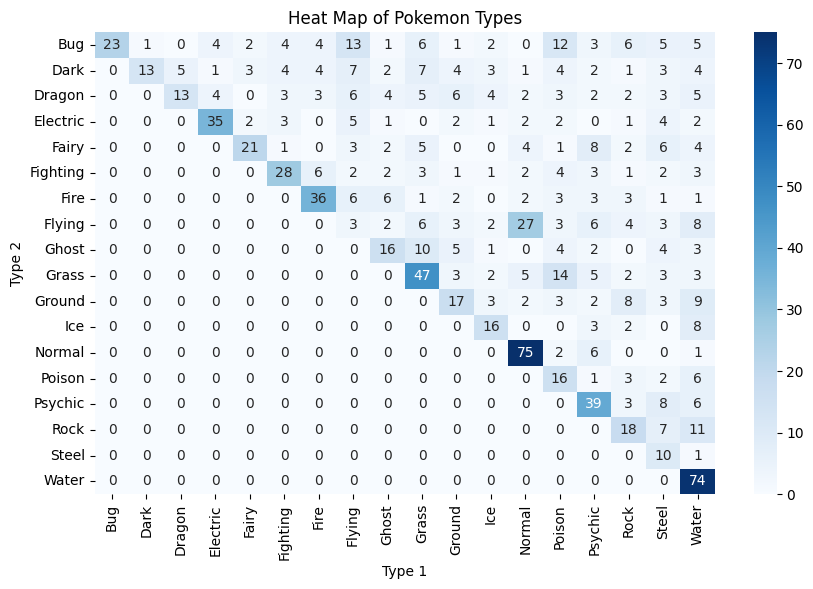

In [65]:
temp_frame = pd.crosstab(fullPokedex_2['Type 1'], fullPokedex_2['Type 2'])
plt.figure(figsize=(10,6))
sns.heatmap(temp_frame, annot=True, fmt='d', cmap="Blues")
plt.xlabel('Type 1')
plt.ylabel('Type 2')
plt.title('Heat Map of Pokemon Types')
plt.show()

### There are (0.5 * 18^2) possible combinations of pokemon types, but it surprises me there is still a sizeable set of type combinations with zero representation.

#### Therefore, the following list addresses the original business question of least-frequent types (in alphabetical order of Type 1 then Type 2):
* Bug-Dragon
* Bug-Normal
* Dragon-Fairy
* Electric-Fire
* Electric-Grass
* Electric-Psychic
* Fairy-Fire (I just randomly picked this as an example earlier, didn't know it would show up here)
* Fairy-Ground
* Fairy-Ice
* Fire-Ice
* Ghost-Normal
* Ghost-Rock
* Ice-Normal
* Ice-Poison
* Ice-Steel
* Normal-Rock
* Normal-Steel

### There are 17 type combinations on this list, that's more than the 10 asked-for, but it will give the design team plenty of options to be creative.